<h1>Importarea modulelor despre analizarea setului de date si vizualizarea acestora

In [2]:
#importarea modulelor despre analizarea setului de date
import numpy as np
import pandas as pd

#importarea modulelor despre vizualizarea setului de date
import seaborn as sns
import matplotlib.pyplot as plt

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<h3>O mica vizualizare a setului de date

In [3]:
df = pd.read_csv('data.csv')
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
df.shape

(7385, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [6]:
df.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


<h3>Selectarea doar coloanelor care au ca tip de date int sau float

In [7]:
numerics = ['int64' , 'float64']

new_df = df.select_dtypes(include=numerics)

new_df.columns

Index(['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')

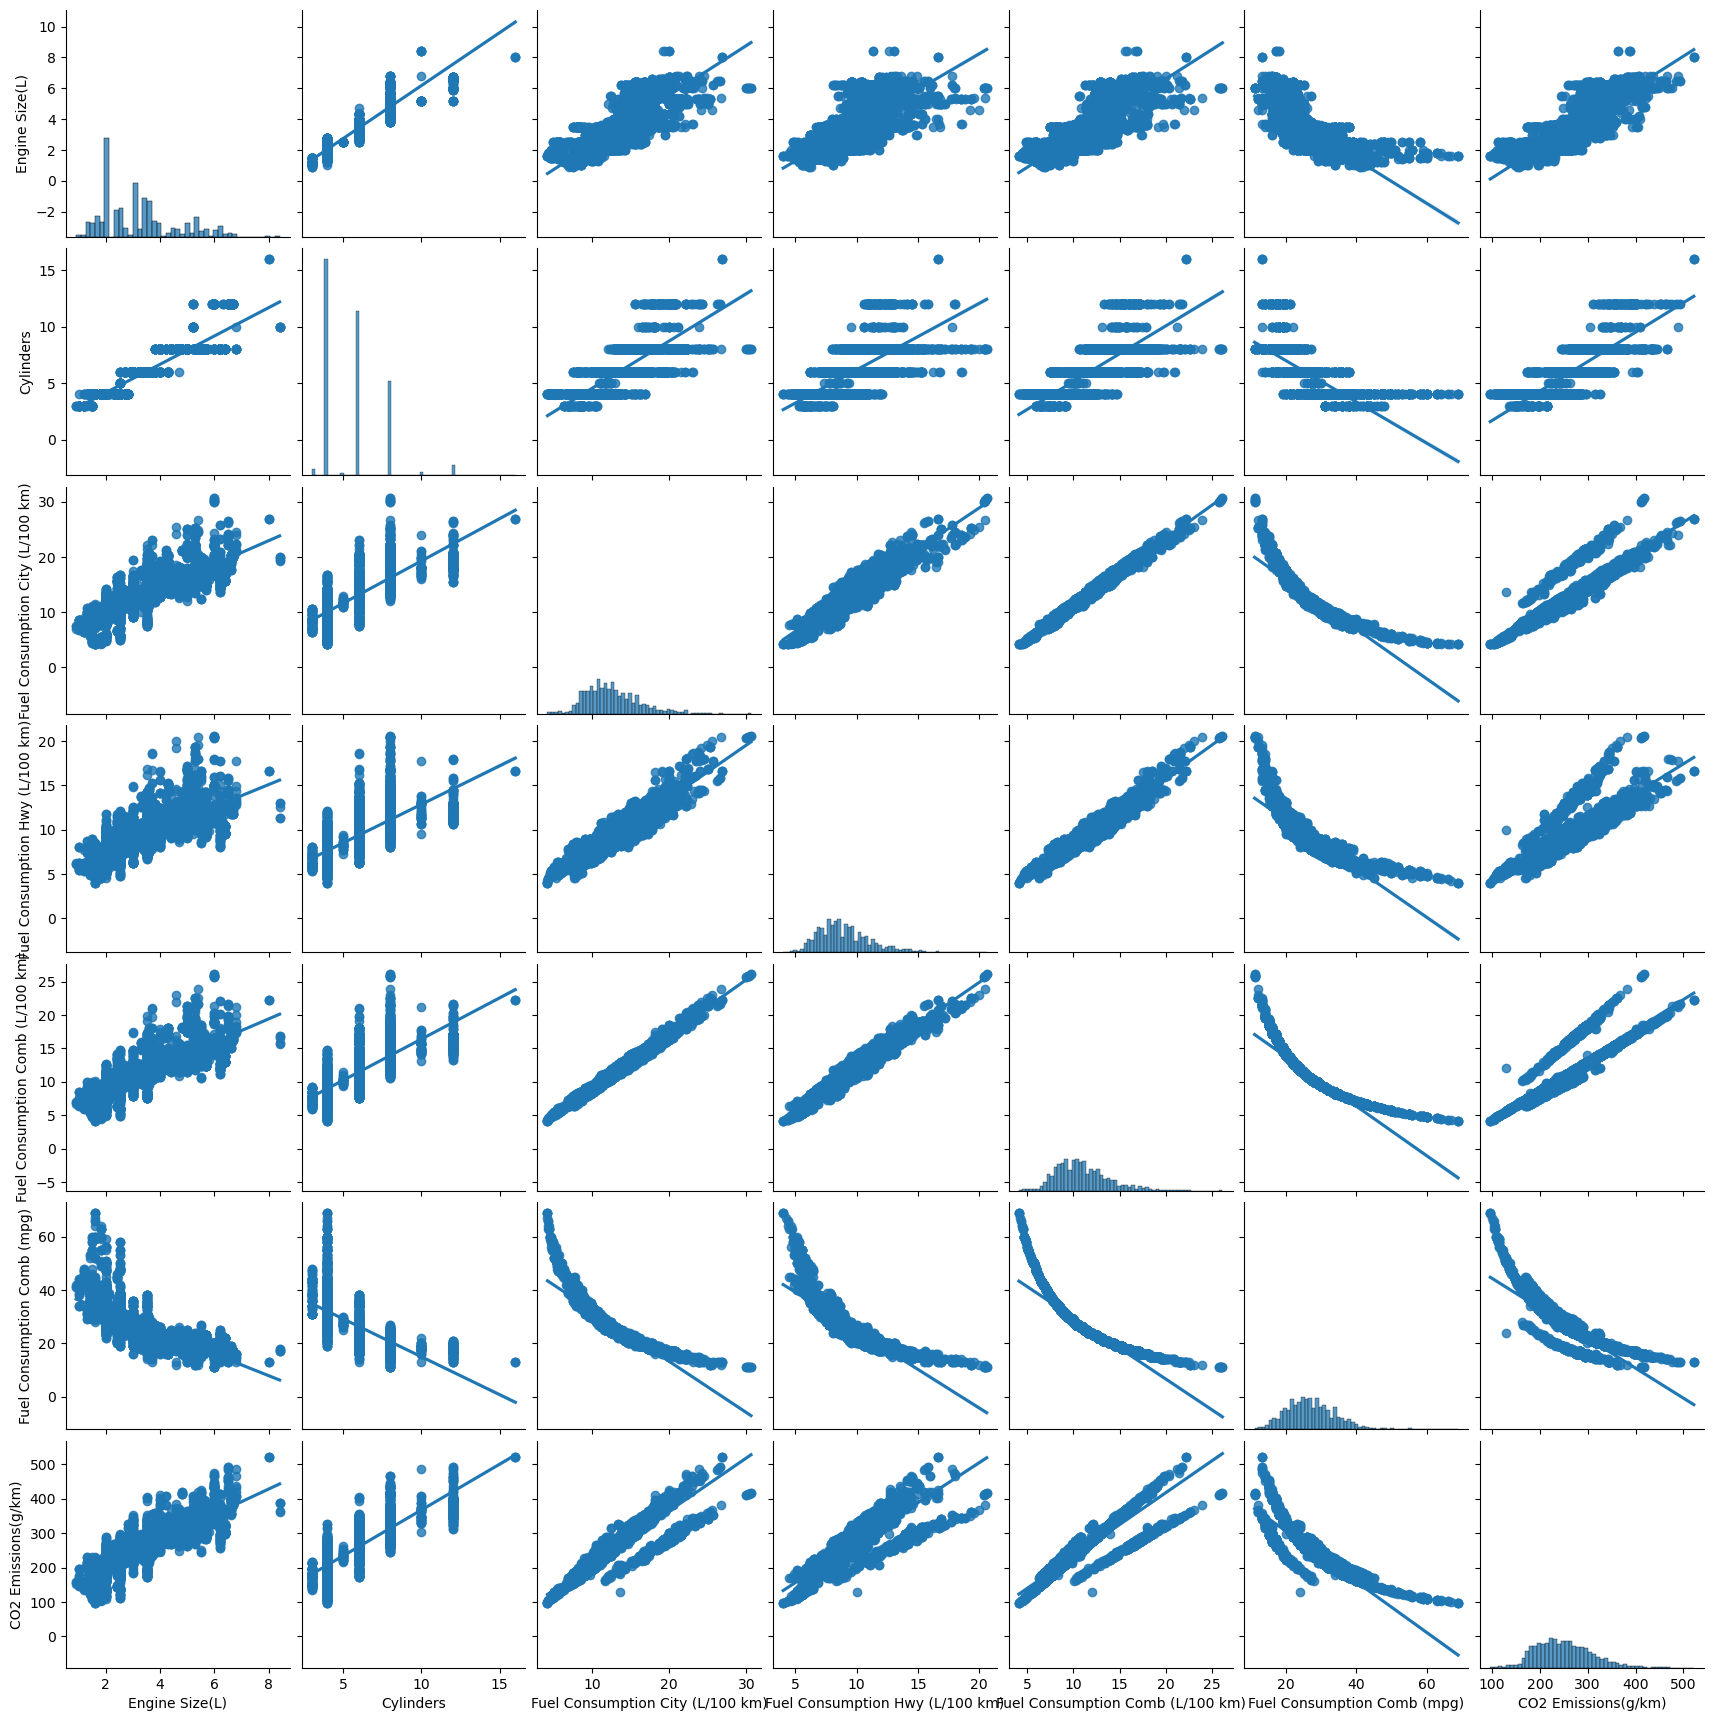

In [8]:
sns.pairplot(new_df, kind = 'reg')

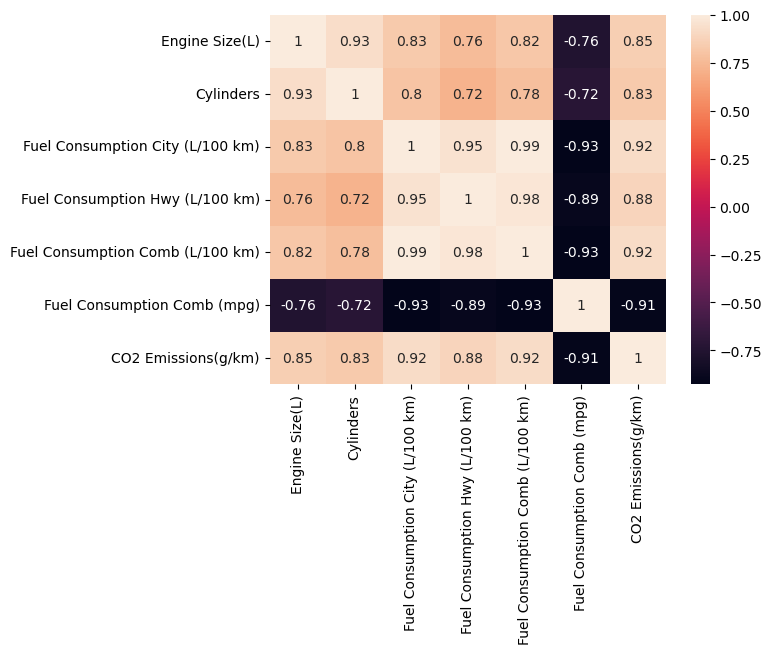

In [9]:
dataplot = sns.heatmap(df.corr(numeric_only=True), annot=True)

plt.show()

In [10]:
new_df.shape

(7385, 7)

In [11]:
X = new_df.iloc[:, :-1]
print(f'Marimea lui x este: {X.shape}')

Marimea lui x este: (7385, 6)


In [12]:
y = new_df.iloc[:, -1]
print(f'Marimea lui y este : {y.shape}')

Marimea lui y este : (7385,)


<h2>Ne ocupam de valorile lipsa

In [13]:
X.isnull().value_counts() # => nu avem valori lipsa

Engine Size(L)  Cylinders  Fuel Consumption City (L/100 km)  Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  Fuel Consumption Comb (mpg)
False           False      False                             False                            False                             False                          7385
Name: count, dtype: int64

<h2>Pregatirea setului de date si splituirea setului de date


In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of X_test: {X_test.shape}')
print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of y_test: {y_test.shape}')

Shape of X_train: (5908, 6)
Shape of X_test: (1477, 6)
Shape of y_train: (5908,)
Shape of y_test: (1477,)


In [16]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

In [17]:
model = lm.fit(X_train, y_train)
model.score(X_test, y_test)

0.9018902750130587

In [18]:
w = model.coef_
b = model.intercept_

print(f'w = {w[0]}, b = {b}')

w = 4.9611401743904295, b = 229.17379762640547


In [19]:
predictie_test = model.predict(X_test)
predictie_train = model.predict(X_train)

In [20]:
print(y_train.shape)
print(predictie_train.shape)

(5908,)
(5908,)


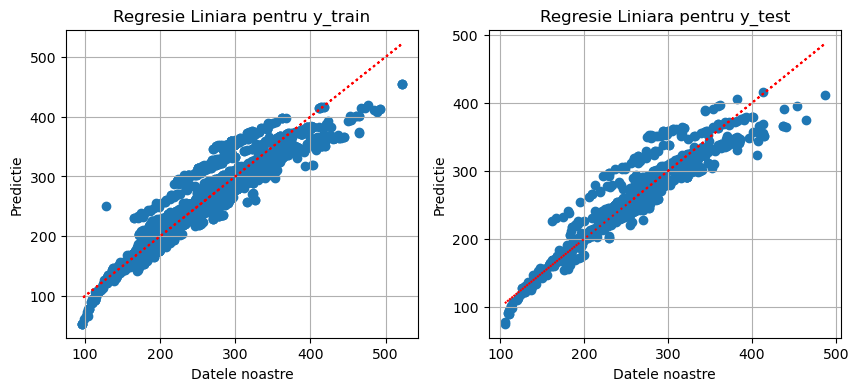

In [21]:
plt.figure(figsize=(10,4))
plt.subplot(121)
plt.scatter(y_train, predictie_train)
plt.plot(y_train.to_numpy(), y_train.to_numpy(), 'r:')
plt.xlabel('Datele noastre')
plt.ylabel('Predictie')
plt.title('Regresie Liniara pentru y_train')
plt.grid()

plt.subplot(122)
plt.scatter(y_test, predictie_test)
plt.plot(y_test.to_numpy(), y_test.to_numpy(), 'r:')
plt.xlabel('Datele noastre')
plt.ylabel('Predictie')
plt.title('Regresie Liniara pentru y_test')
plt.grid()